# Predicción de Riesgo de Crédito
## Juan Pablo Veliz - Proyecto DS - Coderhouse 

### Entendimiento del Negocio

#### Abstracto

[Link a la Presentación Ejecutiva](https://github.com/JuanPabloVeliz/Coder-DS/blob/main/Entregables/Presentacion_Ejecutiva_Veliz.pdf)

Nos referimos como industria de servicios financieros a la oferta de productos y servicios relacionados con la administración del dinero y sus actividades relacionadas como seguros, procesamiento de pagos, banca digital y préstamos.

Hay muchas partes interesadas que compiten dentro de la industria, incluidos los emisores de tarjetas de crédito, los bancos tradicionales y, más recientemente, varias empresas nuevas generalmente englobadas bajo el nombre de "fintech", que brindan servicios financieros con un enfoque tecnológico muy fuerte. Estos recién llegados han acelerado la tendencia digitalizadora de la industria, que se adapta mejor a las nuevas preferencias de los consumidores, en particular de los jóvenes a los que les gusta administrar sus finanzas desde casa. En este escenario, todas las instituciones financieras y las empresas emergentes están perfeccionando su tecnología y ampliando los servicios remotos.

Hay tres tipos de servicios financieros: personales, de consumo y corporativos. En este proyecto estaremos enfocando nuestra atención en las finanzas de consumo y especialmente en la industria del crédito.
Las finanzas de consumo están presentes en casi todas las decisiones económicas que las personas toman en su vida, como comprar un automóvil o una casa, pagar la universidad o hacer un viaje en vacaciones. Todas estas experiencias por lo general requieren un gran gasto que se puede acomodar a un conveniente flujo de efectivo en cuotas a lo largo del tiempo tomando préstamos.
En el otro lado de la mesa, los prestamistas se arriesgan en cada operación, ya que incurren en pérdidas cuando los clientes no devuelven sus préstamos a tiempo. Desde su punto de vista, el riesgo es deseable porque es representativo de una oportunidad de ganancia que se captura en la tasa de interés, pero demasiado riesgo podría conducir a mayores índices de incumplimiento generando pérdidas masivas y potencialmente la quiebra.

Es por eso que la predicción de incumplimiento crediticio es fundamental para administrar el riesgo en un negocio de préstamos al consumidor, ya que permite a los prestamistas optimizar las decisiones de préstamo y crear una mejor experiencia para el cliente.

En este proyecto, utilizaré un conjunto de datos creado con fines educativos por MachineHack, que contiene 67.463 filas y 35 columnas de datos sobre el historial de crédito del tomador y las características del nuevo préstamo para predecir si una persona será morosa o no.

#### Problemática del Negocio y Enfoque

El conjunto de datos seleccionado simula datos históricos para un "P2P Lending Club". También conocido como crowdlending, P2P es la práctica de personas o empresas no relacionadas que prestan dinero a través de servicios en línea que conectan a los prestamistas con los prestatarios.
Los mercados de préstamos P2P han crecido exponencialmente en los últimos años, por lo que hay espacio para motores de recomendación capaces de mostrar las mejores opciones tanto para inversores como para prestatarios.

Como se comentó anteriormente, estaré trabajando en la hipótesis de que es posible predecir si un préstamo caerá en mora utilizando antecedentes e información financiera histórica sobre el tomador del préstamo y las condiciones del préstamo.

En el camino, podremos encontrar ideas para algunas preguntas relevantes del tema, tales como: ¿Cuánto influye el comportamiento financiero pasado en el futuro? ¿Cuál es el/los atributo/s del consumidor más relevante a considerar en la gestión de riesgos? ¿Qué tipo de préstamo es más riesgoso? ¿Existe alguna condición particular que tenga mayor relevancia en la morosidad de los préstamos?

### Entendimiento de los Datos

#### Importación de Librerías y Definición del Dataset Inicial

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.2f}'.format

df = pd.read_csv("https://github.com/JuanPabloVeliz/Coder-DS/blob/main/Dataset/train.csv?raw=true")

#### Descripción de los Datos

A continuación se detallan las características generales del dataset:

Significado de las columnas:

0. Loan ID
1. Loan Amount: Monto del préstamo solicitado.
2. Funded Amount: Monto del préstamo menos cargos prepagos.
3. Funded Amount Investor: en los préstamos P2P, el monto total ofrecido por todos los inversores.
4. Term: Cantidad de tiempo para pagar el préstamo.
5. Batch Enrolled: ID del grupo en el que se registró el préstamo.
6. Interest Rate: Tasa de interés aplicado al préstamo.
7. Grade: Clasificación sociodemográfica, donde A se refiere a mayores ingresos.
8. Sub Grade: Sub-clasificación de Grado (generalmente Grado final ajustado por monto de préstamo y vencimiento de acuerdo a las reglas del mercado P2P).
9. Employment Duration: se refiere a la experiencia laboral del prestatario en el tiempo.
10. Home Ownership: Tipo de tenencia de la vivienda.
11. Verification Status: Indica si la información del prestatario ha sido verificada.
12. Payment Plan: Se refiere al acto de hacer pagos iguales de una cantidad predefinida en una frecuencia predefinida.
13. Loan Title: Describe el propósito del préstamo.
14. Debit to Income: Razón = monto de pagos de deuda comprometida / ingreso.
15. Delinquency - two years: Veces que el prestatario ha dejado de pagar su deuda a tiempo en los últimos 2 años.
16. Inquires - six months: Veces que el prestatario ha sido consultado (buscado) en una base de datos financiera pública.
17. Open Account: Número de líneas de crédito abiertas en el expediente crediticio del prestatario.
18. Public Record: Número de morosidades por las cuales se han emprendido acciones judiciales por parte de un acreedor.
19. Revolving Balance: La cantidad que el titular de la cuenta toma prestada contra una línea de crédito
20. Revolving Utilities: Razón = Saldo Revolvente / Línea de Crédito Total. No aplicable a préstamos a plazos.
21. Total Accounts: Número total de Cuentas en el expediente de crédito del acreditado.
22. Initial List Status: IIndica si el préstamo debe ser fondeado en su totalidad (w) o permite ser fondeado parcialmente (f) por los inversionistas.
23. Total Received Interest: Cantidad de intereses que se ha pagado por el préstamo actual.
24. Total Received Late Fee: Cantidad de cargos por pago atrasado que se ha pagado por el préstamo actual.
25. Recoveries: Cantidad que ha sido cobrada con servicios de cobranza de terceros.
26. Collection Recovery Fee: Tarifas aplicadas a las recuperaciones.
27. Collection 12 months Medical: Indica si algún solicitante tiene facturas médicas impagas por al menos 12 meses.
28. Application Type: Indica si la solicitud es individual (1 solicitante) o conjunta (2 o más solicitantes).
29. Last week Pay: cuántas semanas transcurrieron desde el último pago.
30. Accounts Delinquent: Número de cuentas morosas en el expediente crediticio del prestatario.
31. Total Collection Amount: La acumulación de créditos adeudados por el prestatario.
32. Total Current Balance: el monto actual de todos los cargos, incluidas las tarifas, los intereses, las multas y los créditos.
33. Total Revolving Credit Limit: Límite de línea de crédito asignado.
34. Loan Status: Indica si el préstamo está en mora.

In [40]:
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36,59,BAT2522922,11.14,B,C4,MORTGAGE,176346.63,Not Verified,n,Debt Consolidation,16.28,1,0,13,0,24246,74.93,7,w,2929.65,0.10,2.50,0.79,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12192.00,59,BAT1586599,12.24,C,D3,RENT,39833.92,Source Verified,n,Debt consolidation,15.41,0,0,12,0,812,78.30,13,f,772.77,0.04,2.38,0.97,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22,59,BAT2136391,12.55,F,D4,MORTGAGE,91506.69,Source Verified,n,Debt Consolidation,28.14,0,0,14,0,1843,2.07,20,w,863.32,18.78,4.32,1.02,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.16,59,BAT2428731,16.73,C,C3,MORTGAGE,108286.58,Source Verified,n,Debt consolidation,18.04,1,0,7,0,13819,67.47,12,w,288.17,0.04,0.11,0.75,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.93,59,BAT5341619,15.01,C,D4,MORTGAGE,44234.83,Source Verified,n,Credit card refinancing,17.21,1,3,13,1,1544,85.25,22,w,129.24,19.31,1294.82,0.37,0,INDIVIDUAL,18,0,430,126029,22579,0


In [41]:
df.shape

(67463, 35)

In [42]:
df.dtypes

ID                                int64
Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Batch Enrolled                   object
Interest Rate                   float64
Grade                            object
Sub Grade                        object
Employment Duration              object
Home Ownership                  float64
Verification Status              object
Payment Plan                     object
Loan Title                       object
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Public Record                     int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status              object
Total Received Interest         float64
Total Received Late Fee         float64


In [43]:
df.select_dtypes(include="object").nunique().sort_values()

Payment Plan             1
Initial List Status      2
Application Type         2
Employment Duration      3
Verification Status      3
Grade                    7
Sub Grade               35
Batch Enrolled          41
Loan Title             109
dtype: int64

In [44]:
df.select_dtypes(include="number").nunique().sort_values()

Accounts Delinquent                 1
Loan Status                         2
Collection 12 months Medical        2
Term                                3
Public Record                       5
Inquires - six months               6
Delinquency - two years             9
Open Account                       36
Total Accounts                     69
Last week Pay                     162
Total Collection Amount          2193
Revolving Balance               20582
Funded Amount                   24548
Loan Amount                     27525
Total Revolving Credit Limit    37708
Total Current Balance           60901
Collection Recovery Fee         67313
Total Received Late Fee         67380
Recoveries                      67387
Funded Amount Investor          67441
Interest Rate                   67448
Total Received Interest         67451
Home Ownership                  67454
Debit to Income                 67454
Revolving Utilities             67458
ID                              67463
dtype: int64

In [45]:
df.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,67463.00,67463.00,67463.00,67463.00,67463.00,67463.00,67463.00,67463.00,67463.00,67463.00,67463.00,67463.00,67463.00,67463.00,67463.00,67463.00,67463.00,67463.00,67463.00,67463.00,67463.00,67463.00,67463.00,67463.00,67463.00,67463.00
mean,25627607.75,16848.90,15770.60,14621.80,58.17,11.85,80541.50,23.30,0.33,0.15,14.27,0.08,7699.34,52.89,18.63,2068.99,1.14,59.69,1.13,0.02,71.16,0.00,146.47,159573.93,23123.01,0.09
std,21091554.02,8367.87,8150.99,6785.35,3.33,3.72,45029.12,8.45,0.80,0.47,6.23,0.35,7836.15,22.54,8.32,2221.92,5.24,357.03,3.49,0.14,43.32,0.00,744.38,139033.25,20916.70,0.29
min,1297933.00,1014.00,1014.00,1114.59,36.00,5.32,14573.54,0.68,0.00,0.00,2.00,0.00,0.00,0.01,4.00,4.74,0.00,0.00,0.00,0.00,0.00,0.00,1.00,617.00,1000.00,0.00
25%,6570288.00,10012.00,9266.50,9831.68,58.00,9.30,51689.84,16.76,0.00,0.00,10.00,0.00,2557.00,38.66,13.00,570.90,0.02,1.63,0.48,0.00,35.00,0.00,24.00,50379.00,8155.50,0.00
50%,17915646.00,16073.00,13042.00,12793.68,59.00,11.38,69335.83,22.66,0.00,0.00,13.00,0.00,5516.00,54.08,18.00,1330.84,0.04,3.34,0.78,0.00,68.00,0.00,36.00,118369.00,16733.00,0.00
75%,42715208.50,22106.00,21793.00,17807.59,59.00,14.19,94623.32,30.05,0.00,0.00,16.00,0.00,10184.50,69.18,23.00,2656.96,0.07,5.45,1.07,0.00,105.00,0.00,46.00,228375.00,32146.50,0.00
max,72245779.00,35000.00,34999.00,34999.75,59.00,27.18,406561.54,39.63,8.00,5.00,37.00,4.00,116933.00,100.88,72.00,14301.37,42.62,4354.47,166.83,1.00,161.00,0.00,16421.00,1177412.00,201169.00,1.00


#### Primera limpieza
Del análisis anterior, se desprende que:
* La columna el ID no es nesesaria y se eliminará.
* Las columnas "Accounts Delinquent" y "Payment Plan" tienen valores únicos a lo largo del dataset, por lo tanto no van a aportar información significativa y se eliminarán.
* La columna "Home Ownership" tiene un valor que no se puede identificar a qué corresponde. Se renombrará.
* La columna "Employment Duration" contiene los valores correspondientes a "Home Ownership". Se renombrará.
* Entre las variables categóricas, la columna "Loan Title" tiene una cardinalidad muy alta. Se reducirá.


In [46]:
df.drop(["ID", "Payment Plan", "Accounts Delinquent"], inplace=True, axis=1)

df.rename(columns={"Home Ownership": "Unknown Value", "Employment Duration": "Home Ownership"}, inplace=True)

loan_titles = ["Consolidation", "Refinancing"]
df.loc[df["Loan Title"].str.contains(loan_titles[0], case=False), "Loan Title"] = loan_titles[0]
df.loc[df["Loan Title"].str.contains(loan_titles[1], case=False), "Loan Title"] = loan_titles[1]
df.loc[~df["Loan Title"].str.contains('|'.join(loan_titles), case=False), "Loan Title"] = "Other"

Avanzando con el modelado de los datos, la siguiente tarea es convertir las variables categóricas en numéricas.

In [47]:
from sklearn.preprocessing import LabelEncoder

home_ownerships = LabelEncoder().fit(df["Home Ownership"])
initial_list_status = LabelEncoder().fit(df["Initial List Status"])
application_types = LabelEncoder().fit(df["Application Type"])
loan_titles =LabelEncoder().fit(df["Loan Title"])
batches_enrolled = LabelEncoder().fit(df["Batch Enrolled"].sort_values())
grades = LabelEncoder().fit(df["Grade"].sort_values())
sub_grades = LabelEncoder().fit(df["Sub Grade"].sort_values())

df["Home Ownership"] = home_ownerships.transform(df["Home Ownership"])
df["Initial List Status"] = initial_list_status.transform(df["Initial List Status"])
df["Application Type"] = application_types.transform(df["Application Type"])
df["Loan Title"] = loan_titles.transform(df["Loan Title"])
df["Batch Enrolled"] = batches_enrolled.transform(df["Batch Enrolled"])
df["Grade"] = grades.transform(df["Grade"])
df["Sub Grade"] = sub_grades.transform(df["Sub Grade"])

df["Verification Status"].replace({"Not Verified": 0, "Source Verified": 1, "Verified": 2}, inplace=True)

Veamos cómo quedan los datos luego de la limpieza.

In [48]:
df.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,Unknown Value,Verification Status,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36,59,16,11.14,1,13,0,176346.63,0,0,16.28,1,0,13,0,24246,74.93,7,1,2929.65,0.10,2.50,0.79,0,0,49,31,311301,6619,0
1,3609,11940,12192.00,59,4,12.24,2,17,2,39833.92,1,0,15.41,0,0,12,0,812,78.30,13,0,772.77,0.04,2.38,0.97,0,0,109,53,182610,20885,0
2,28276,9311,21603.22,59,11,12.55,5,18,0,91506.69,1,0,28.14,0,0,14,0,1843,2.07,20,1,863.32,18.78,4.32,1.02,0,0,66,34,89801,26155,0
3,11170,6954,17877.16,59,15,16.73,2,12,0,108286.58,1,0,18.04,1,0,7,0,13819,67.47,12,1,288.17,0.04,0.11,0.75,0,0,39,40,9189,60214,0
4,16890,13226,13539.93,59,32,15.01,2,18,0,44234.83,1,2,17.21,1,3,13,1,1544,85.25,22,1,129.24,19.31,1294.82,0.37,0,0,18,430,126029,22579,0


#### Determinación de la variable de interés y análisis univariado
La variable a predecir será la columna "Loan Status", que toma los valores:
* 0 = Préstamo devuelto
* 1 = Préstamo en default

Como se ve a continuación, el dataset está desbalanceado y contienen más casos 0 que 1. Por este motivo voy a hacer un rebalanceo aumentando la muestra de 1.

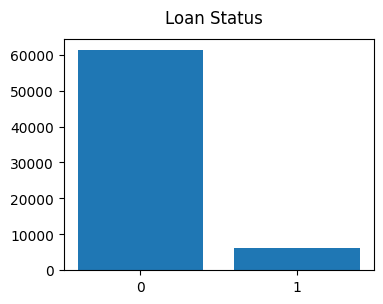

Cantidad de muestras en el dataset original:
0    61222
1     6241
Name: Loan Status, dtype: int64


In [49]:
x = df["Loan Status"].unique()
y = df["Loan Status"].value_counts()

fig = plt.figure(figsize=(4,3))
fig.suptitle("Loan Status")
plt.bar(x,y)
plt.xticks(df["Loan Status"].unique())
plt.show()

print("Cantidad de muestras en el dataset original:")
print(df["Loan Status"].value_counts())

In [50]:
from sklearn.utils import resample

status_0 = df[df["Loan Status"]==0]
status_1 = df[df["Loan Status"]==1]

status_1_resampled = resample(status_1, n_samples=len(status_0), random_state=50)

resampled_df = pd.concat([status_1_resampled, status_0])

print("Cantidad de muestras luego del rebalanceo:")
print(resampled_df["Loan Status"].value_counts())

Cantidad de muestras luego del rebalanceo:
1    61222
0    61222
Name: Loan Status, dtype: int64


#### Evaluación y procesamiento de valores nulos

Como se ve a continuación, no existen en el dataset valores nulos:

In [51]:
df.isna().sum()

Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Home Ownership                  0
Unknown Value                   0
Verification Status             0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay                   0
Total Collection Amount         0
Total Current 

#### Evaluación y procesamiento de valores atípicos

Utilizo el método de Isolation Forest para detectar outliers. Los casos detectados son excluídos de la muestra.

In [52]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(random_state=0)
clf.fit(df)
isolated = clf.predict(resampled_df)
resampled_df["Outlier"] = isolated

clean_df = resampled_df[resampled_df["Outlier"] == 1]
clean_df.drop(columns="Outlier", inplace=True)

print("Resultado de la detección de outliers:")
print(resampled_df["Outlier"].value_counts())

Resultado de la detección de outliers:
 1    110365
-1     12079
Name: Outlier, dtype: int64


#### EDA - Exploración de Datos

Luego de la limpieza inicial, continuamos con la exploración de los datos.

##### Análisis univariados
A continuación vamos a analizar visualmente algunas de las variables que permiten entender mejor la información disponible.

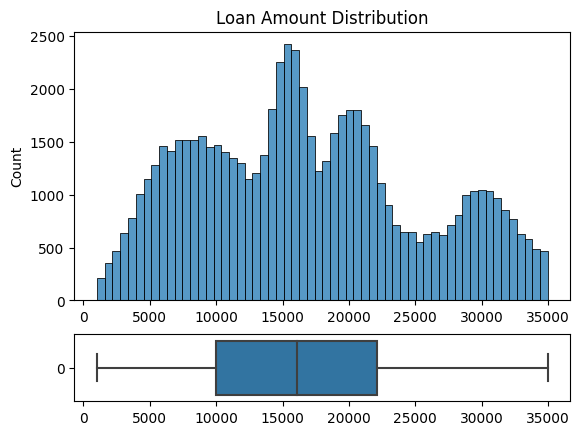

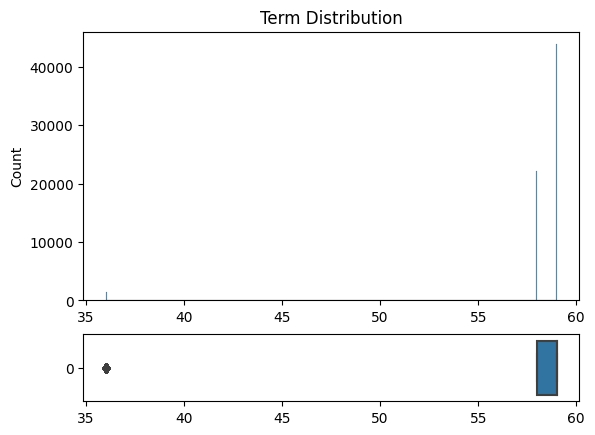

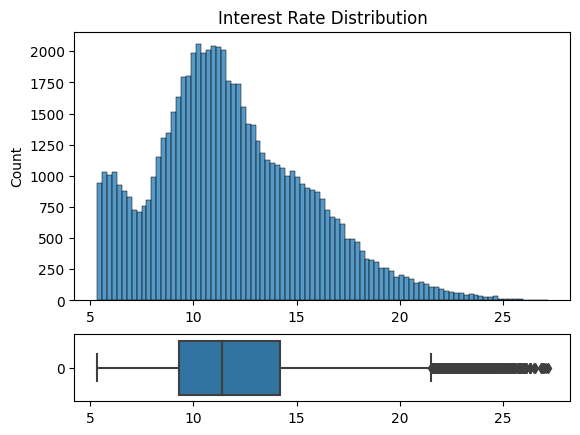

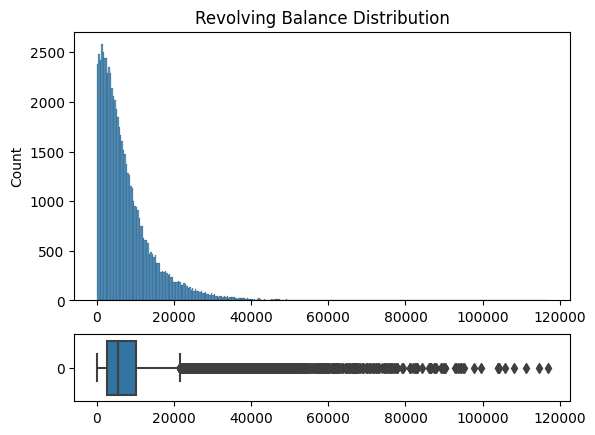

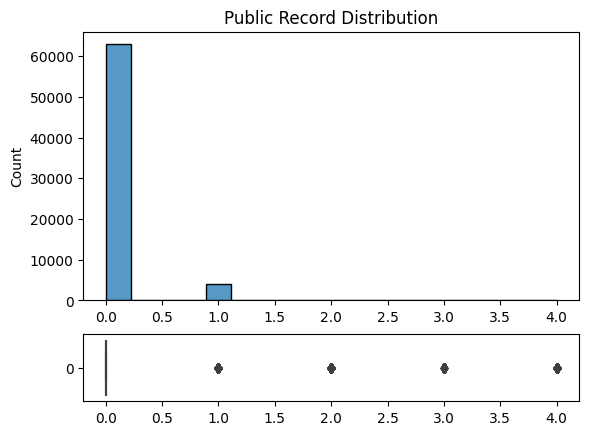

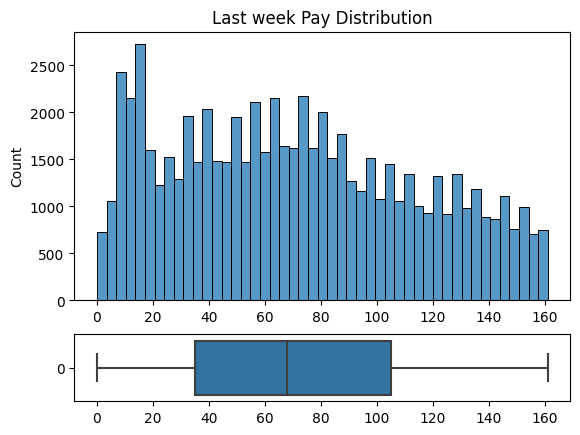

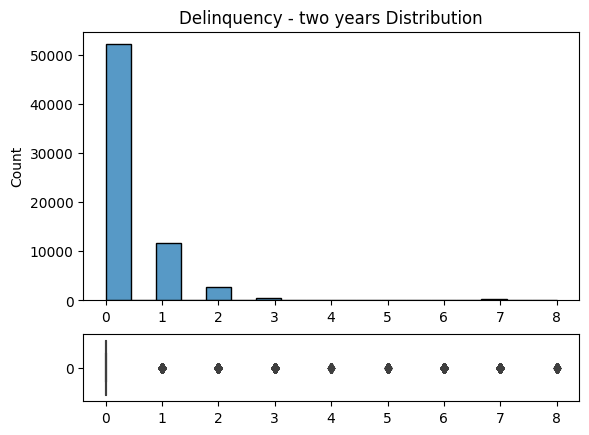

In [53]:
to_plot = df[['Loan Amount','Term','Interest Rate','Revolving Balance', 'Public Record', 'Last week Pay', 'Delinquency - two years']]

def plot_distribution(df, variables):
    for i, var_name in enumerate(variables):
        fig, axs = plt.subplots(nrows= 2, gridspec_kw=dict(height_ratios=[4,1]))
        g1 = sns.histplot(df[var_name], ax=axs[0])
        g1.set_title(var_name+" Distribution")
        g1.set_xlabel(None)
        g2 = sns.boxplot(df[var_name], ax=axs[1],  orient="h")

        axs[1].get_shared_x_axes().join(axs[0], axs[1])
        plt.show()

plot_distribution(to_plot, to_plot.columns)

##### Análisis Multivariado

No se aprecian altas correlaciones entre las variables del dataset. Particularmente resulta interesante que no existe ninguna variable que esté fuertemente correlacionada con la variable objetivo. Dada esta situación asumo tener bajas probabilidades de obtener insights de la exploración visual, por lo que no sigo avanzando en este sentido.

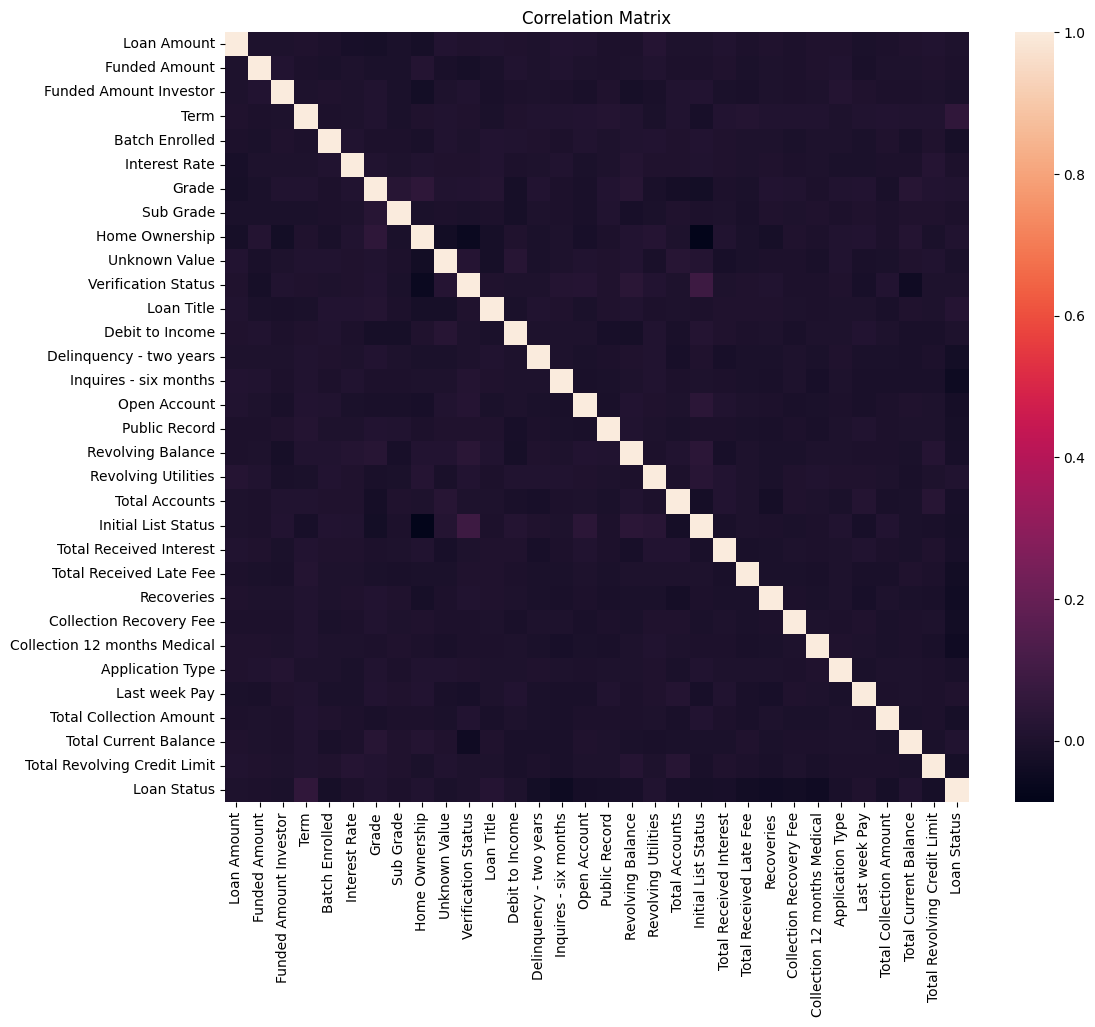

In [54]:
plt.figure(figsize=(12,10))
g = sns.heatmap(clean_df.corr(), xticklabels=clean_df.columns, yticklabels=clean_df.columns).set(title="Correlation Matrix")
plt.show()

### Selección del algoritmo

Como primera prueba voy a utilizar el Decision Tree Clasifier con sus valores por defecto y hacer la posterior evaluación.

In [55]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

# Cargar los datos
X = clean_df.drop(["Loan Status"], axis=1)
y = clean_df["Loan Status"]

# Separacion train/test
X_train, X_test, y_train, y_test = train_test_split(X, y)

print("Resumen del resultado de la separación:")
print("Tamaño del set de entrenamiento:", X_train.shape)
print("Tamaño del set de pruebas:", X_test.shape)

print("Porcentaje de Trues en set de entrenamiento:", "{:.2%}".format(y_train.sum()/len(y_train)))
print("Porcentaje de Trues en set de prueba:", "{:.2%}".format(y_test.sum()/len(y_test)))

print("Balance de Trues en la variable objetivo:")
print(y.value_counts())

Resumen del resultado de la separación:
Tamaño del set de entrenamiento: (82773, 31)
Tamaño del set de pruebas: (27592, 31)
Porcentaje de Trues en set de entrenamiento: 45.99%
Porcentaje de Trues en set de prueba: 46.08%
Balance de Trues en la variable objetivo:
0    59580
1    50785
Name: Loan Status, dtype: int64


In [56]:
# Decision Tree

#Paso 1 :Instanciar
clf = DecisionTreeClassifier(random_state=0)

#Paso 2 : Fit con la información
model = clf.fit(X_train, y_train)

#Paso 3 : Predicción sobre el dataset original
dt_pred = model.predict(df.drop(["Loan Status"], axis=1))

print("Parámetros utilizados:")
clf.get_params()

Parámetros utilizados:


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

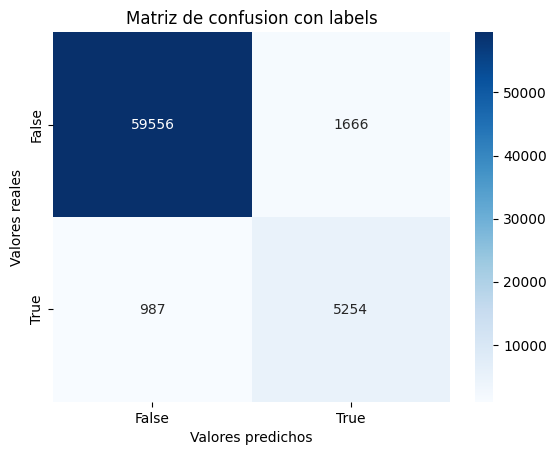

Accuracy (tp + tn / Total):  96.07%  Etiquetados correctamente
Precision Score (tp / (tp + fp)):  75.92%  Predicciones positivas acertadas
Recall Score (tp / (tp + fn)):  84.19%  Casos positivos detectados
F1-Score (2 * (precision * recall ) / (precision + recall)):  79.84%  Media armónica entre Precision y Recall


In [57]:
def cf_matrix(pred):
    cf_matrix = confusion_matrix(df["Loan Status"], pred)
    ax = sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
    ax.set_title('Matriz de confusion con labels')
    ax.set_xlabel('Valores predichos')
    ax.set_ylabel('Valores reales')
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    plt.show()

def metrics(pred):
    print("Accuracy (tp + tn / Total): ","{:.2%}".format(accuracy_score(df["Loan Status"], pred)), " Etiquetados correctamente")
    print("Precision Score (tp / (tp + fp)): ","{:.2%}".format(precision_score(df["Loan Status"], pred, average="binary")), " Predicciones positivas acertadas")
    print("Recall Score (tp / (tp + fn)): ","{:.2%}".format(recall_score(df["Loan Status"], pred, average="binary")), " Casos positivos detectados")
    print("F1-Score (2 * (precision * recall ) / (precision + recall)): ","{:.2%}".format(f1_score(df["Loan Status"], pred, average="binary")), " Media armónica entre Precision y Recall")

cf_matrix(dt_pred)
metrics(dt_pred)

El resultado de la prueba es muy alentador. Estamos obteniendo valores razonables para las predicciones.

Es interesante remarcar que en el contexto de este negocio, la medida de Recall (que da una idea de la incidencia de los falsos negativos) es las más importante, ya que indica la cantidad de defaults detectados que se podrían evitar mediante la aplicación del algoritmo, esquivando así la pérdida total del capital.

Los falsos positivos, que se pueden medir mediante la precisión, implican que se niega el otorgamiento de un crédito que a-posteriori no resulta riesgoso. En este caso existe la pérdida de un negocio y su consecuente renta, pero se entiende que estos casos son menos lesivos en comparación con los falsos negativos.

#### Conclusiones

El modelo actual, es capaz de etiquetar correctamente aproximadamente el 95% de los casos,con buena especificidad y sensibilidad.

### Comparación de modelos
A continuación voy a comparar los resultados de varios algoritmos que normalmente se utilizan en problemas de clasificación como este en el que estoy trabajando. Estos son:
* Decision Tree
* SGD
* KNN
* Random Forest


In [58]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, log_loss, confusion_matrix


In [59]:
# Cargar los datos

X = clean_df.drop(["Loan Status"], axis=1)
y = clean_df["Loan Status"]

# Separacion train/test
X_train, X_test, y_train, y_test = train_test_split(X, y)

#Preparación de funciones para evaluación
def cf_matrix(pred, model):
    cf_matrix = confusion_matrix(df["Loan Status"], pred)
    ax = sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
    ax.set_title('Matriz de confusion - '+ model)
    ax.set_xlabel('Valores predichos')
    ax.set_ylabel('Valores reales')
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    return ax

def metrics(pred, model):
    print("Evaluación del modelo - ", model)
    print("Accuracy (tp + tn / Total): ","{:.2%}".format(accuracy_score(df["Loan Status"], pred)), " Etiquetados correctamente")
    print("Precision Score (tp / (tp + fp)): ","{:.2%}".format(precision_score(df["Loan Status"], pred, average="binary")), " Predicciones positivas acertadas")
    print("Recall Score (tp / (tp + fn)): ","{:.2%}".format(recall_score(df["Loan Status"], pred, average="binary")), " Casos positivos detectados")
    print("F1-Score (2 * (precision * recall ) / (precision + recall)): ","{:.2%}".format(f1_score(df["Loan Status"], pred, average="binary")), " Media armónica entre Precision y Recall")

Instancio cada uno de los clasificadores y realizo las predicciones.

In [60]:
# Decision Tree
#Paso 1 :Instanciar
model = DecisionTreeClassifier(random_state=0, class_weight="balanced")
#Paso 2 : Fit con la información
model.fit(X_train, y_train)
#Paso 3 : Predicción
dt_pred = model.predict(df.drop(["Loan Status"], axis=1))


In [61]:
# SGD Classifier
#Paso 1: Instanciar el objeto
model = SGDClassifier(loss="hinge", max_iter=1000) 
#Paso 2: Ajustar el modelo
model.fit(X_train, y_train) 
#Paso 3: Predicción del modelo
sgd_pred = model.predict(df.drop(["Loan Status"], axis=1))

In [62]:
# K-Neighbors
#Paso 1: Instanciar el objeto
model = KNeighborsClassifier(n_neighbors=5) 
#Paso 2: Ajustar el modelo
model.fit(X_train, y_train) 
#Paso 3: Predicción del modelo
knn_pred = model.predict(df.drop(["Loan Status"], axis=1))

In [63]:
# Random Forest
#Paso 1: Instanciar el objeto
model = RandomForestClassifier() 
#Paso 2: Ajustar el modelo
model.fit(X_train, y_train) 
#Paso 3: Predicción del modelo
rdf_pred = model.predict(df.drop(["Loan Status"], axis=1))

Ploteo las matrices de confusión a modo de comparación:

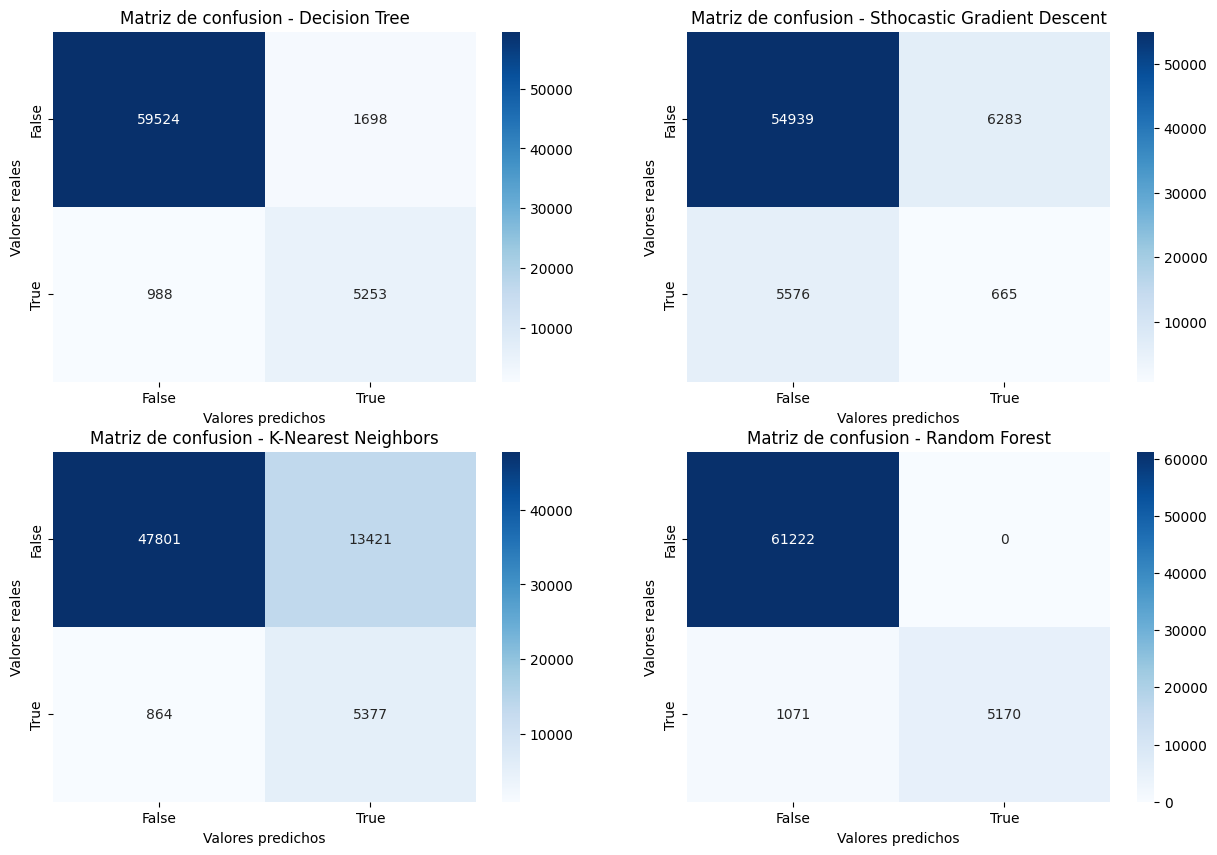

In [64]:
models = ({"Decision Tree":dt_pred, "Sthocastic Gradient Descent":sgd_pred,"K-Nearest Neighbors":knn_pred, "Random Forest":rdf_pred})

fig, axs = plt.subplots(2,2, figsize=(15,10))

i=0
for title, model in models.items():
    plt.subplot(2,2,i+1)
    cf_matrix(model, title)
    i +=1

A continuación se exponen las métricas obtenidas por cada algoritmo.

In [65]:
metricas = pd.DataFrame(({'metricas':['Accuracy', 'Precision', 'Recall', 'F1-Score']}))

for model, pred in models.items():
    metricas[model] = [accuracy_score(df["Loan Status"], pred),
                        precision_score(df["Loan Status"], pred),
                        recall_score(df["Loan Status"], pred), 
                        f1_score(df["Loan Status"], pred)]

metricas

,metricas,Decision Tree,Sthocastic Gradient Descent,K-Nearest Neighbors,Random Forest
0,Accuracy,0.96,0.82,0.79,0.98
1,Precision,0.76,0.10,0.29,1.00
2,Recall,0.84,0.11,0.86,0.83
3,F1-Score,0.80,0.10,0.43,0.91


### Conclusión inicial

La comparación numérica de las métricas confirma la percepción obtenida al mirar las matrices de confusión. 

De los modelos probados, el SGD y el KNN son los de peor desempeño, mientras que el Desicion Tree y el Random Forest se comportan de forma satisfactoria y bastante similar.

Si bien las métricas del Random Forest son más altas, podríamos estar frente a un caso de overfitting. Además el Recall del Decision Tree es mayor y tal como se comentó anteriormente, esta medida es la más relevante para el contexto del negocio.

La conclusión es que el Decision Tree es el algoritmo más aconsejable para implementar.

### Feature Selection y reevaluación del modelo

A continuación realizo un proceso de eliminación de variables con el objetivo de ayudar a mejorar la performance del modelo. A tal efecto, utilizo PCA para identificar las más importantes y así poder de descartar las que no estén aportando valor.

Como se ve a continuación, reduciendo el modelo a sus 2 componentes principales, vemos que el PCA1 es capaz de explicar aproximadamente el 90% de las variaciones.

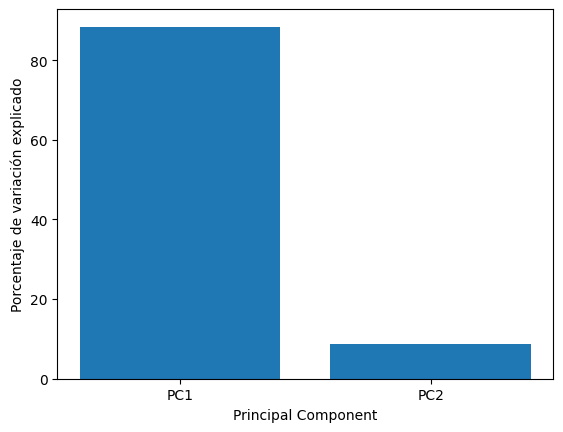

In [66]:
from sklearn.decomposition import PCA

x = clean_df.drop(columns="Loan Status")
y = clean_df["Loan Status"]

#Intancio el objeto pca
pca = PCA(n_components=2)

#Entreno usando el dataset ajustado
pca.fit(X)

#Genero los datos para el modelo
pca_data = pca.transform(X)

#% de variación que explica cada componente
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)

#Genero los nombre de los componentes, 1 por cada uno incluído en "per_var"
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Porcentaje de variación explicado')
plt.xlabel('Principal Component')
plt.show()

El paso siguiente es analizar cuáles son las variables más influyentes en cada componente.

Sorprendentemente, se ve que cada componente está vinculado a 1 sola variable. Esto indicaría que podríamos mantener la eficacia del modelo utilizando sólo las variables comprometidas "Unknown Value" y "Total Current Balance".

In [67]:
## Obtengo los pesos de las variables en el primer componente
pesos_PCA1 = pd.Series(pca.components_[0], index=X.columns)
pesos_PCA2 = pd.Series(pca.components_[1], index=X.columns)

# Muestro los primeros 5 elementos de cada componente 
print("Pesos PCA1")
print(pesos_PCA1.abs().sort_values(ascending=False)[0:5])

print("Pesos PCA2")
print(pesos_PCA2.abs().sort_values(ascending=False)[0:5])

Pesos PCA1
Total Current Balance          1.00
Unknown Value                  0.00
Total Revolving Credit Limit   0.00
Revolving Balance              0.00
Loan Amount                    0.00
dtype: float64
Pesos PCA2
Unknown Value                  1.00
Total Revolving Credit Limit   0.00
Loan Amount                    0.00
Funded Amount                  0.00
Revolving Balance              0.00
dtype: float64


A continuación, defino un nuevo dataset incluyendo sólo las columnas relacionadas con los componentes principales. Luego, utilizo este dataset resumido para entrenar un nuevo Decision Tree y realizo su evaluación.

Evaluación del modelo -  Decision Tree
Accuracy (tp + tn / Total):  96.07%  Etiquetados correctamente
Precision Score (tp / (tp + fp)):  75.91%  Predicciones positivas acertadas
Recall Score (tp / (tp + fn)):  84.27%  Casos positivos detectados
F1-Score (2 * (precision * recall ) / (precision + recall)):  79.87%  Media armónica entre Precision y Recall


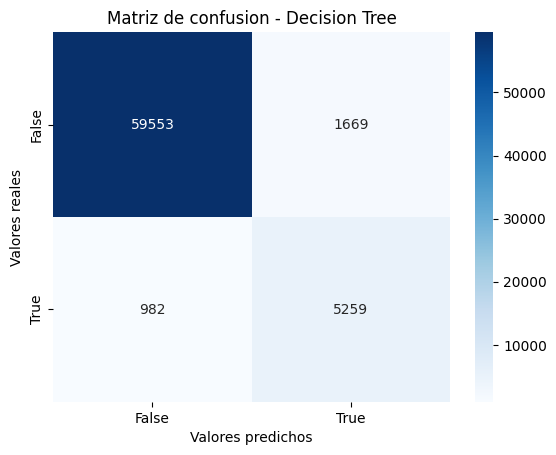

In [68]:
pca_df = clean_df[["Total Current Balance", "Unknown Value", "Loan Status"]]

#Preparo los datos

X = pca_df.drop(columns="Loan Status")
y = pca_df["Loan Status"]

#Separo train/test
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Decision Tree
#Paso 1 :Instanciar
model = DecisionTreeClassifier(random_state=0)
#Paso 2 : Fit con la información
model.fit(X_train, y_train)
#Paso 3 : Predicción
pred = model.predict(df[["Total Current Balance", "Unknown Value"]])

cf_matrix(pred, "Decision Tree")
metrics(pred, "Decision Tree")

### Conclusiones Finales

Tal como inferimos a partir del resultado de la aplicación del PCA, utilizando sólo las 2 variables destacadas es suficiente para que el modelo mantenga una performance aceptable.

Respecto a las las variables utilizadas, una de ellas ("Unknown Value") corresponde a una serie de datos que no estaba correctamente identificada en el dataset original. Si se tratara de datos de un negocio real, resultaría muy importante solicitar al proveedor de los datos una aclaración sobre a qué se refiere la variable en cuestión.

Respecto al modelo, el haber reducido la cantidad de variables de las 32 iniciales a sólo 2 es una ganancia muy relevante ya que resultará ser un modelo de aplicación más simple a la hora de hacer el despliegue.